In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
plt.style.use('Solarize_Light2')
from astropy import units as u
import astropy.coordinates as coord
from mpl_toolkits import mplot3d
from sklearn.datasets import make_blobs
import seaborn as sns
import hdbscan
import math


mpl.rcParams['figure.dpi'] = 150


In [12]:
blobs, labels = make_blobs(n_samples=2000, n_features=10) # 10 features
pd.DataFrame(blobs).head() # show the first 5 rows

clusterer = hdbscan.HDBSCAN()

def healpix(sourceID, level):
    pixel = math.floor(sourceID /(2**35 * 4**(12-level)))
    return pixel





In [3]:
clusterer.fit(blobs) # do the clustering algorithm

#clusterer stores the results of the clusters in the labels_ attribute

clusterer.labels_ # show the labels of the clusters
# This gives an array of integers, where each integer is the cluster number of the corresponding row in the input data

cluster_amount = clusterer.labels_.max() +1 # number of clusters

cluster_amount
#data samples that are not assigned to a cluster get label -1   



3

In [4]:
membership_score = clusterer.probabilities_ # membership score of each data point to the cluster it is assigned to ranging from 0 to 1. 
# A score of 0.0 represents a sample that is not in the cluster at all (all noise points will get this score)
# while a score of 1.0 represents a sample that is at the heart of the cluster (note that this is not the spatial centroid notion of core).

membership_score

array([0.81333396, 0.91361697, 0.78481776, ..., 0.84878764, 0.57972546,
       1.        ])

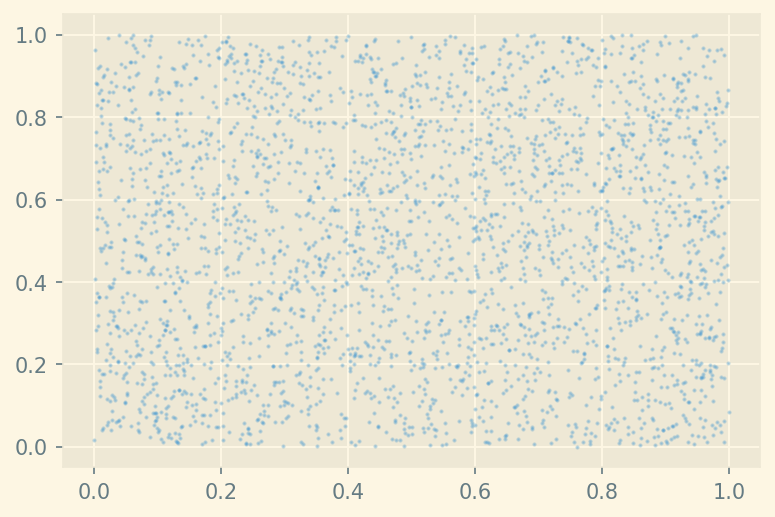

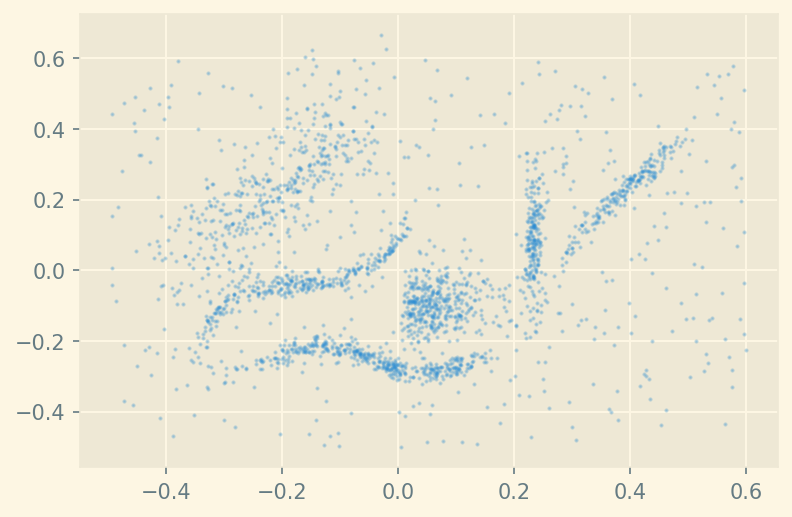

In [5]:
#//generate 3000 random datapoints in 2d

data = np.load('Data\\clusterable_data.npy')
randomdata = np.random.rand(3000,2)
plt.plot(randomdata[:,0], randomdata[:,1], 'o', markersize=1, alpha=0.25, linewidth = 0)
plt.show()

plt.plot(*data.T, 'o', markersize=1, alpha=0.25, linewidth = 0)
plt.show()


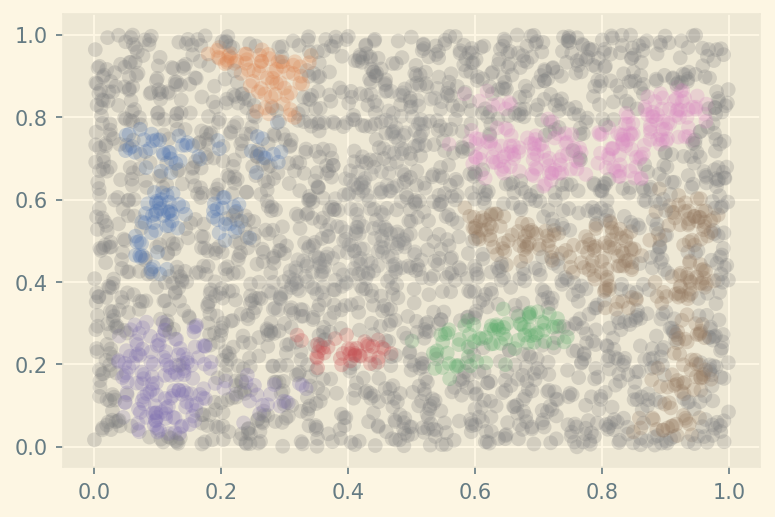

In [6]:

randclusterer = hdbscan.HDBSCAN(min_cluster_size=30).fit(randomdata)
color_palette = sns.color_palette('deep', 77)

cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in randclusterer.labels_]

cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, randclusterer.probabilities_)]

plt.scatter(randomdata[:,0], randomdata[:,1], s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)



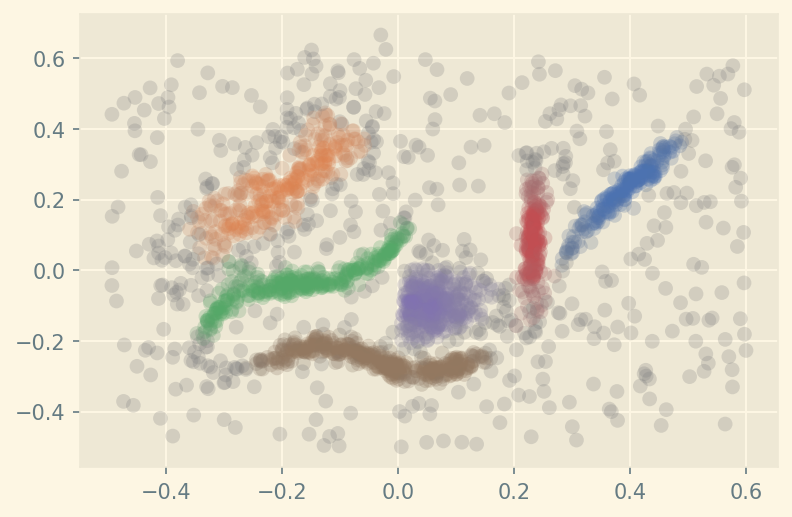

In [7]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(data)
color_palette = sns.color_palette('deep', 8)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*data.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

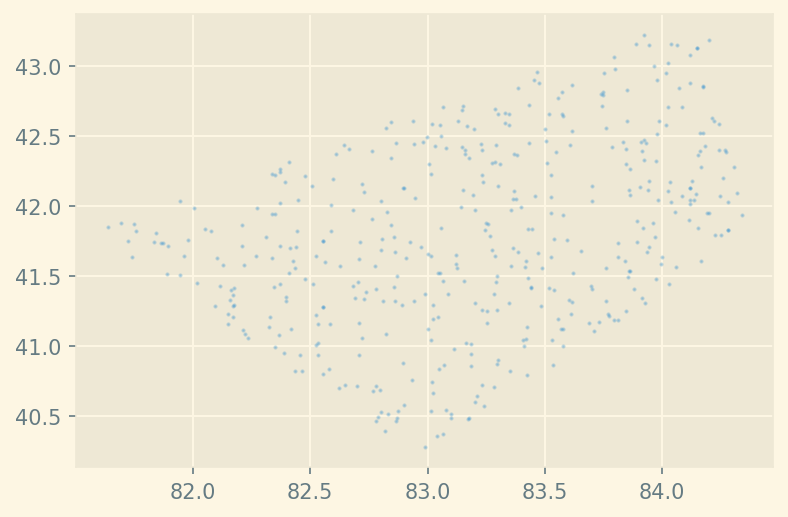

,Cluster,ID,GaiaDR3,inrt,Prob,RAdeg,e_RAdeg,DEdeg,e_DEdeg,GLON,...,o_RVd,GRVSmag,e_GRVSmag,o_GRVSmag,Vbroad,e_Vbroad,o_Vbroad,VarFlag,NSS,RVS
0,COIN-Gaia_13,303,194528620843178752,1,0.541666,82.370965,0.260455,41.594963,0.207133,167.540430,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NOT_AVAILABLE,0,0
1,COIN-Gaia_13,303,260202626469685760,1,0.575899,70.895822,0.014587,50.882600,0.010955,155.351306,...,3.0,12.348811,0.037831,16.0,NaN,NaN,NaN,NOT_AVAILABLE,0,0
2,COIN-Gaia_13,303,260184931204681216,0,0.480374,70.074811,0.039874,50.678417,0.027444,155.162949,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NOT_AVAILABLE,0,0
3,COIN-Gaia_13,303,260129504645646848,0,0.485351,71.214757,0.077421,50.456878,0.053206,155.806457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NOT_AVAILABLE,0,0
4,COIN-Gaia_13,303,260126034312640000,0,0.485351,70.746870,0.112031,50.377673,0.075714,155.671330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NOT_AVAILABLE,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,Platais_10,5199,5870055464143741824,1,0.975971,204.931756,0.005472,-59.245882,0.007088,309.080036,...,32.0,11.494267,0.012265,20.0,11.244612,11.602124,15.0,VARIABLE,0,0
765,Platais_10,5199,5870057564411487488,1,1.000000,205.131906,0.128383,-59.164399,0.144391,309.196160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NOT_AVAILABLE,0,0
766,Platais_10,5199,5870063302523028224,0,0.485122,205.071345,0.036739,-58.974273,0.041705,309.201537,...,8.0,13.569287,0.134858,13.0,NaN,NaN,NaN,NOT_AVAILABLE,0,0
767,Platais_10,5199,6062340153554921856,1,0.504886,199.268441,0.035987,-58.411407,0.048065,306.293396,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NOT_AVAILABLE,0,0


In [134]:
coindata = pd.read_csv('Data\\1715597823704O-result.csv')
members = pd.read_csv('Data\\inner_members.csv')
                                                
coindata = coindata[coindata['phot_g_mean_mag'] <= 12]
 
plt.plot(coindata['ra'], coindata['dec'], 'o', markersize=1, alpha=0.25, linewidth = 0)
plt.show()
members

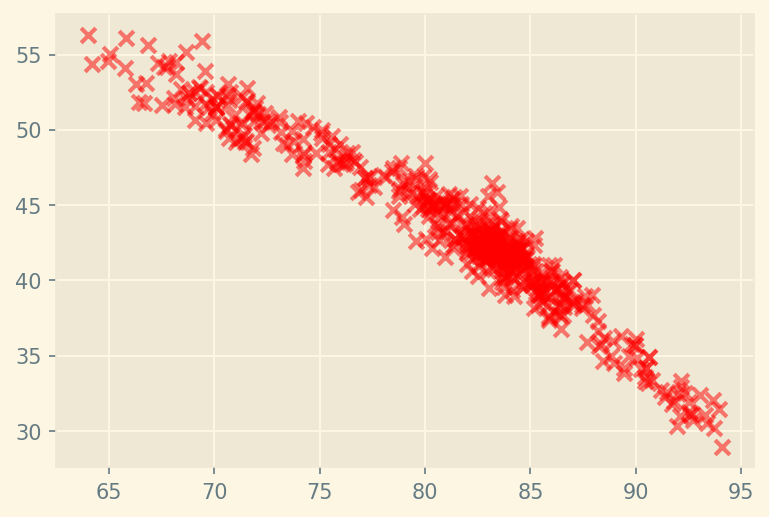

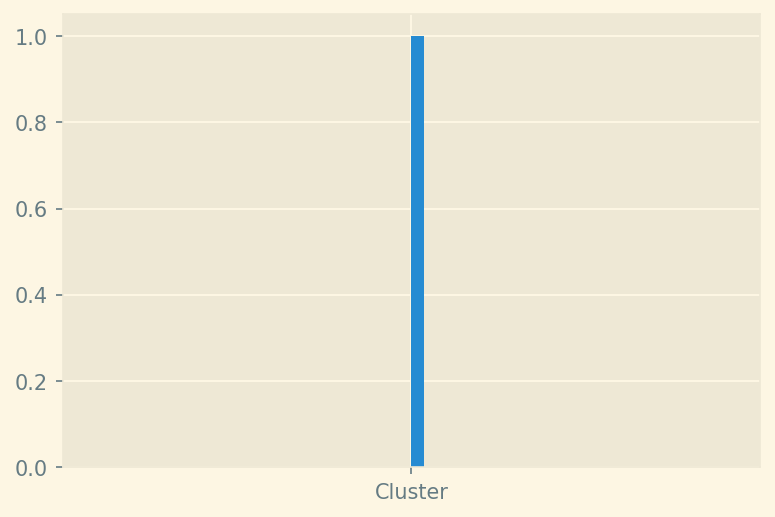

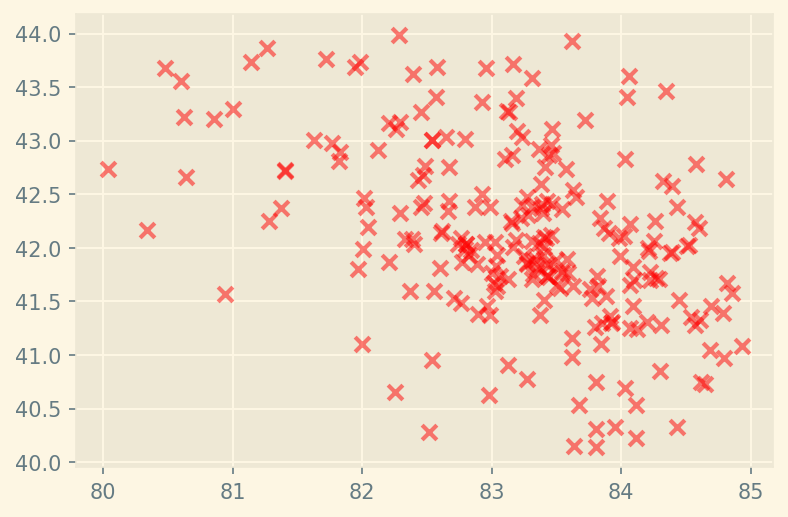

In [141]:

COINmembers = members[members['Cluster'] == 'COIN-Gaia_13']

plt.scatter(COINmembers['RAdeg'], COINmembers['DEdeg'],marker= 'x', s=50, c='red', alpha=0.5)
plt.show()

clusters = members['Cluster'].unique()

plt.hist(['Cluster'], bins = 50)
plt.show()
COINmembers = COINmembers[(COINmembers['DEdeg'] >= 40) & (COINmembers['DEdeg'] <= 44) & (COINmembers['RAdeg'] >= 80) & (COINmembers['RAdeg'] <= 85)]

plt.scatter(COINmembers['RAdeg'], COINmembers['DEdeg'],marker= 'x', s=50, c='red', alpha=0.5)
plt.show()

In [142]:
coinneeded = coindata[['ra', 'dec', 'parallax', 'pmra', 'pmdec']]
coinneeded = coinneeded.dropna()

coinclusterer = hdbscan.HDBSCAN(min_cluster_size=10, cluster_selection_method='leaf', min_samples=10).fit(coinneeded)

print(coinclusterer.labels_.max() + 1)



3


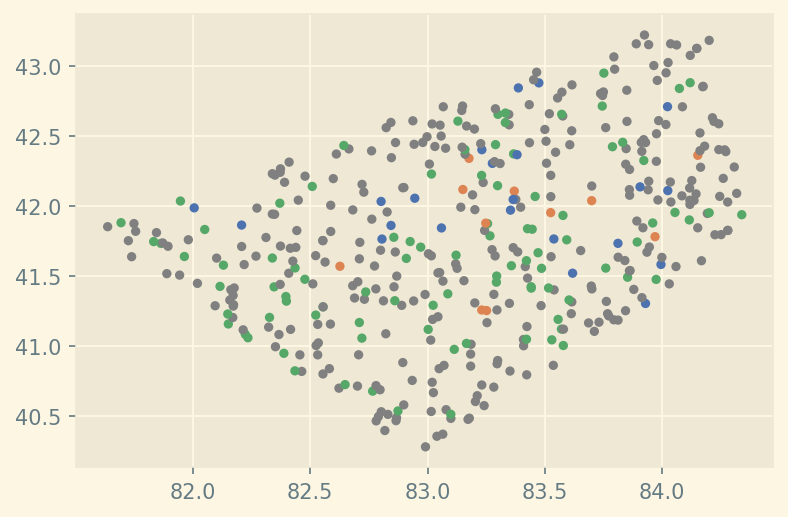

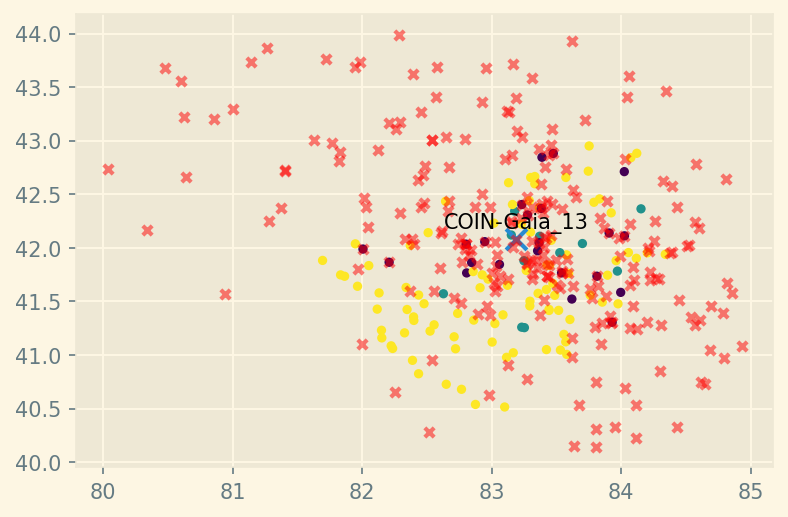

In [144]:
indices_to_keep = np.where(coinclusterer.labels_ != -1)[0]
filtered_df = coinneeded.iloc[indices_to_keep]


color_palette = sns.color_palette('deep', coinclusterer.labels_.max() + 1)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in coinclusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, coinclusterer.probabilities_)]
plt.scatter(coinneeded['ra'], coinneeded['dec'], s=20, linewidth=0, c=cluster_colors )
plt.show()

plt.scatter(filtered_df['ra'], filtered_df['dec'], s=20, linewidth=0, c=coinclusterer.labels_[indices_to_keep] )
plt.scatter(83.186, 42.087, marker = 'x', s = 100)
plt.annotate('COIN-Gaia_13', (83.186, 42.087), textcoords="offset points", xytext=(0,5), ha='center')
plt.scatter(COINmembers['RAdeg'], COINmembers['DEdeg'],marker= 'x', s=20, c='red', alpha=0.5)
plt.show()